## Google Analytics Reporting API

This script requests a report from Google Analytics Reporting API and returns the response as a dataframe. It can handle pivot reports, summary reports with no pivot, and simple reports with no dimensions.

To establish proper credentials, you need to:

1. Create a project on Google Cloud Platform
2. Enable Google Analytics Reporting API for this project
3. Create a service account associated with the project
4. Generate API keys for the service account
5. In GA Admin panel, give your service account (looks like an email address) read access to your site's GA data.


Links:

Creating projects: https://cloud.google.com/resource-manager/docs/creating-managing-projects
Creating service account keys: https://cloud.google.com/iam/docs/creating-managing-service-account-keys
Metrics and dimensions: https://ga-dev-tools.appspot.com/dimensions-metrics-explorer/ 

In [1]:
import numpy as np
import pandas as pd
from google.oauth2 import service_account
from apiclient.discovery import build
from googleapiclient.discovery import build
from oauth2client.service_account import ServiceAccountCredentials

import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
VIEW_ID = 'xxxxx'
ga_keys = 'xxxxx.json'

### Request Client_ID of the customers with different variables

In [5]:
# Set up the credentials
credentials = service_account.Credentials.from_service_account_file(
    'xxxxxx.json',
    scopes=['https://www.googleapis.com/auth/analytics.readonly']
)

# Set up the Google Analytics Reporting API
analytics = build('analyticsreporting', 'v4', credentials=credentials)

# Define the request parameters
request = {
    'viewId': VIEW_ID,
    'dateRanges': [{'startDate': '2022-01-01', 'endDate': '2023-10-20'}],
    'metrics': [{'expression': 'ga:pageviews'}, {'expression': 'ga:sessions'}],
    'dimensions': [{'name': 'ga:clientid'}, {'name': 'ga:cityId'}, 
                   {'name': 'ga:country'}, {'name': 'ga:browser'}],
    "pageSize": 100000
}

# Execute the request
response = analytics.reports().batchGet(body={'reportRequests': [request]}).execute()

# Parse the response and create a Pandas dataframe
data = []
for report in response['reports']:
    for row in report['data']['rows']:
        dimensions = row['dimensions']
        metrics = row['metrics'][0]['values']
        data.append(dimensions + metrics)

columns = ['clientid', 'cityId', 'Country', 'Browser', 'Pageviews', 'sessions']
df = pd.DataFrame(data, columns=columns)

In [6]:
df

,clientid,cityId,Country,Browser,Pageviews,sessions
0,8124d397-d3b3-4ec1-b367-08f445ba9dc7,1003645,Cameroon,Chrome,2,1
1,1000000519.1676036599,1015431,United States,Safari,3,1
2,1000001615.1655070536,1001873,Canada,Chrome,1,1
3,1000004920.1646568941,1011785,Qatar,Safari,1,1
4,1000006056.1678146554,1002191,Canada,Chrome,3,1
...,...,...,...,...,...,...
99995,509195609.1658704074,1002376,Canada,Chrome,2,1
99996,509200007.1644978906,1007753,India,Chrome,1,1
99997,509211086.1668582549,1024808,United States,Safari,1,1
99998,509224891.1651490967,1002451,Canada,Chrome,1,1


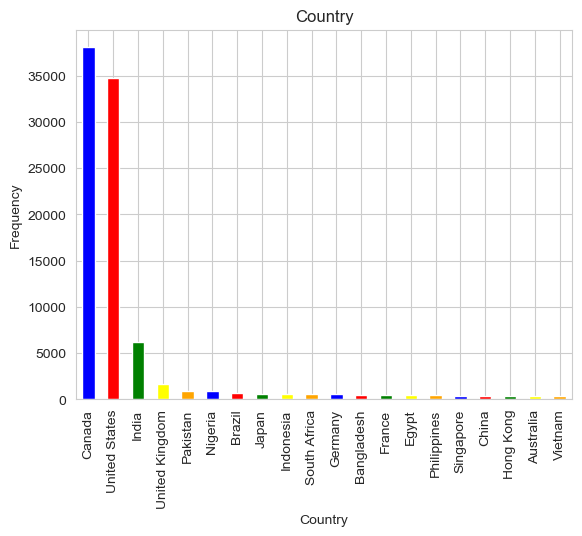

In [7]:
df['Country'].value_counts().head(20).plot(kind='bar',title='Country', color = ['blue','red','green','yellow','orange'])
plt.xlabel('Country')
plt.ylabel('Frequency');

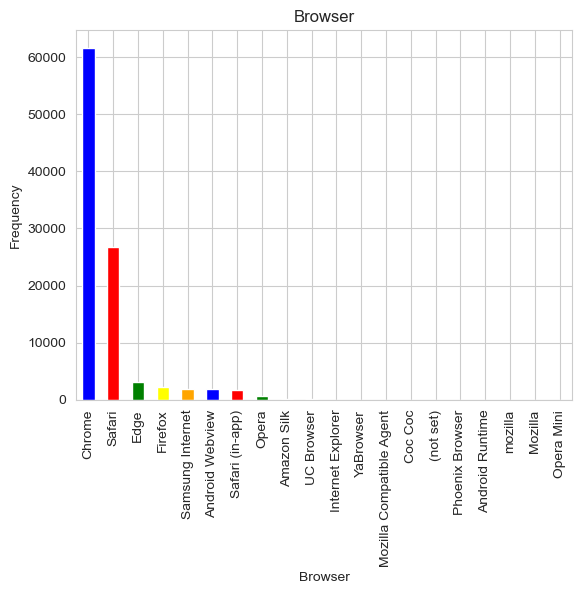

In [8]:
df['Browser'].value_counts().head(20).plot(kind='bar',title='Browser', color = ['blue','red','green','yellow','orange'])
plt.xlabel('Browser')
plt.ylabel('Frequency');

### Request the total number of users from "2022-01-01" to "2023-10-20"

In [10]:
# HelloAnalytics.py

from apiclient.discovery import build
from oauth2client.service_account import ServiceAccountCredentials


SCOPES = ['https://www.googleapis.com/auth/analytics.readonly']
ga_keys = 'xxxxxx.json'
VIEW_ID = 'xxxxxxx'


def initialize_analyticsreporting():
    credentials = ServiceAccountCredentials.from_json_keyfile_name(
                                ga_keys, SCOPES
                            )
    analytics = build('analyticsreporting', 'v4', credentials=credentials)
    return analytics


def get_report(analytics):
    return analytics.reports().batchGet(
            body={
            'reportRequests': [{
                'viewId': VIEW_ID,
                'dateRanges': [{"startDate": "2022-01-01", "endDate": "2023-10-20"}],
                'metrics': [{'expression': 'ga:users'}],
             }]
            }
            ).execute()


def print_response(response):
    for report in response['reports'][0]['data']['rows']:
        value = report['metrics'][0]
        print("the total number of users :", value)

        
def main():
    analytics = initialize_analyticsreporting()
    response = get_report(analytics)
    print_response(response)


if __name__ == '__main__':
    main()

the total number of users : {'values': ['127658']}


### Get the number of users and date per day

In [11]:
# HelloAnalytics.py

from apiclient.discovery import build
from oauth2client.service_account import ServiceAccountCredentials


SCOPES = ['https://www.googleapis.com/auth/analytics.readonly']
ga_keys = 'xxxxxxxx.json'
VIEW_ID = 'xxxxxxx'


def initialize_analyticsreporting():
    credentials = ServiceAccountCredentials.from_json_keyfile_name(
                                ga_keys, SCOPES
                            )
    analytics = build('analyticsreporting', 'v4', credentials=credentials)
    return analytics


def get_report(analytics):
    return analytics.reports().batchGet(
            body={
            'reportRequests': [{
                'viewId': VIEW_ID,
                'dateRanges': [{"startDate": "2023-01-01", "endDate": "2023-10-01"}],
                'dimensions': [{'name': 'ga:date'}],  # add 
                'metrics': [{'expression': 'ga:users'}],
             }]
            }
            ).execute()


def print_response(response):
    for report in response['reports'][0]['data']['rows']:
        value = report     # dimensions metrics
        print(value)

        
def main():
    analytics = initialize_analyticsreporting()
    response = get_report(analytics)
    print_response(response)


if __name__ == '__main__':
    main()

{'dimensions': ['20230101'], 'metrics': [{'values': ['156']}]}
{'dimensions': ['20230102'], 'metrics': [{'values': ['253']}]}
{'dimensions': ['20230103'], 'metrics': [{'values': ['341']}]}
{'dimensions': ['20230104'], 'metrics': [{'values': ['321']}]}
{'dimensions': ['20230105'], 'metrics': [{'values': ['260']}]}
{'dimensions': ['20230106'], 'metrics': [{'values': ['168']}]}
{'dimensions': ['20230107'], 'metrics': [{'values': ['93']}]}
{'dimensions': ['20230108'], 'metrics': [{'values': ['74']}]}
{'dimensions': ['20230109'], 'metrics': [{'values': ['246']}]}
{'dimensions': ['20230110'], 'metrics': [{'values': ['330']}]}
{'dimensions': ['20230111'], 'metrics': [{'values': ['320']}]}
{'dimensions': ['20230112'], 'metrics': [{'values': ['375']}]}
{'dimensions': ['20230113'], 'metrics': [{'values': ['259']}]}
{'dimensions': ['20230114'], 'metrics': [{'values': ['211']}]}
{'dimensions': ['20230115'], 'metrics': [{'values': ['207']}]}
{'dimensions': ['20230116'], 'metrics': [{'values': ['312

#### Prepare an "user_value" list for storing the users and a "days" list for storing dates

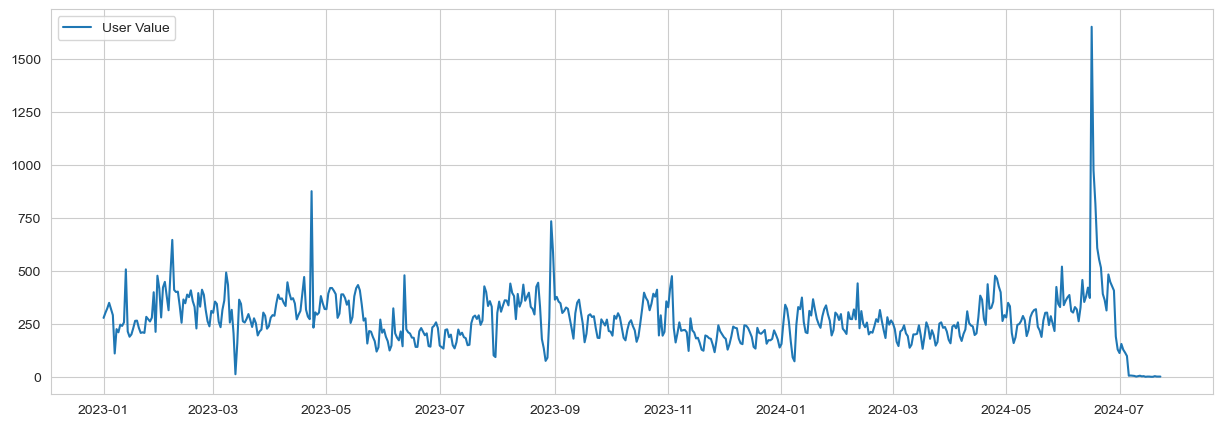

In [12]:
# HelloAnalytics.py

from apiclient.discovery import build
from oauth2client.service_account import ServiceAccountCredentials


SCOPES = ['https://www.googleapis.com/auth/analytics.readonly']
ga_keys = 'xxxxxxxx.json'
VIEW_ID = 'xxxxxx'


def initialize_analyticsreporting():
    credentials = ServiceAccountCredentials.from_json_keyfile_name(
                                ga_keys, SCOPES
                            )
    analytics = build('analyticsreporting', 'v4', credentials=credentials)
    return analytics


def get_report(analytics):
    return analytics.reports().batchGet(
            body={
            'reportRequests': [{
                'viewId': VIEW_ID,
                'dateRanges': [{"startDate": "2022-01-01", "endDate": "2023-10-20"}],
                'dimensions': [{'name': 'ga:date'}],  # add 
                'metrics': [{'expression': 'ga:users'}],
             }]
            }
            ).execute()


user_value = []
days = []

def print_response(response):
    for report in response['reports'][0]['data']['rows']:
        value = report['metrics'][0]['values'][0]
        user_value.append(int(value))      
        
    for i in range(len(user_value)):
        day = datetime.date(2023,1,1) + datetime.timedelta(days=i)
        days.append(day)

        
def api_plot(x, y):
    plt.figure(figsize=(15, 5))
    plt.plot(x, y, label='User Value')
    plt.legend()
    plt.show()


def main():
    analytics = initialize_analyticsreporting()
    response = get_report(analytics)
    print_response(response)
    api_plot(days, user_value)


if __name__ == '__main__':
    main()

### Get and visualize page views

To get page views, just add it in "metrics" as well as the number of users.

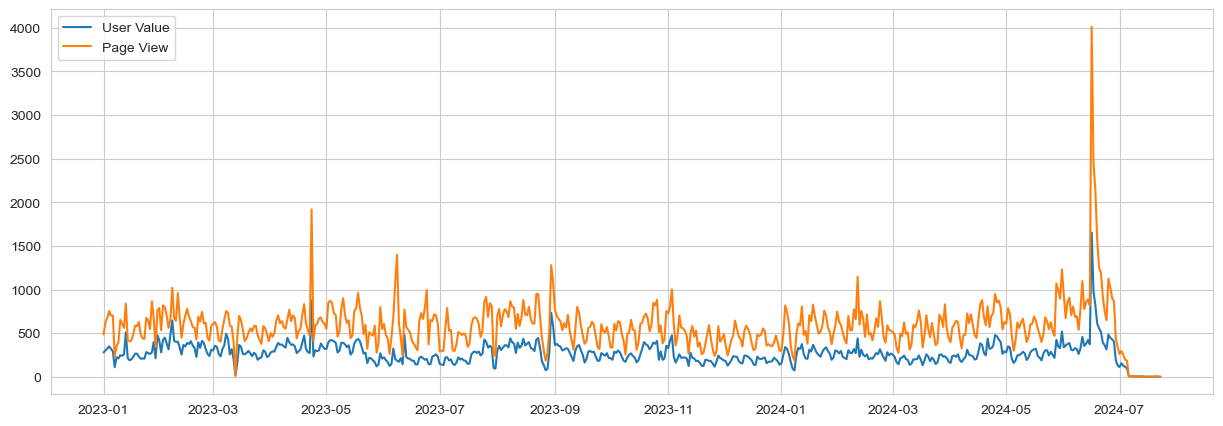

In [15]:
# HelloAnalytics.py

from apiclient.discovery import build
from oauth2client.service_account import ServiceAccountCredentials


SCOPES = ['https://www.googleapis.com/auth/analytics.readonly']
KEY_FILE_LOCATION = 'xxxxxx.json'
VIEW_ID = 'xxxxxxx'


def initialize_analyticsreporting():
    credentials = ServiceAccountCredentials.from_json_keyfile_name(
                                KEY_FILE_LOCATION, SCOPES
                            )
    analytics = build('analyticsreporting', 'v4', credentials=credentials)
    return analytics


def get_report(analytics):
    return analytics.reports().batchGet(
            body={
            'reportRequests': [{
                'viewId': VIEW_ID,
                'dateRanges': [{"startDate": "2022-01-01", "endDate": "2023-10-20"}],
                'dimensions': [{'name': 'ga:date'}],  # add 
                'metrics': [{'expression': 'ga:users'}, {'expression': 'ga:pageviews'}], # add
             }]
            }
            ).execute()


user_value = []
days = []
page_view = [] 

def print_response(response):
    for report in response['reports'][0]['data']['rows']:
        value = report['metrics'][0]['values'][0]
        view = report['metrics'][0]['values'][1]
        user_value.append(int(value))
        page_view.append(int(view))
        
    for i in range(len(user_value)):
        day = datetime.date(2023,1,1) + datetime.timedelta(days=i)
        days.append(day)

        
def api_plot(x, y, y1):  
    plt.figure(figsize=(15, 5))
    plt.plot(x, y, label='User Value')
    plt.plot(x, y1, label='Page View') 
    plt.legend()
    plt.show()


def main():
    analytics = initialize_analyticsreporting()
    response = get_report(analytics)
    print_response(response)
    api_plot(days, user_value, page_view)


if __name__ == '__main__':
    main()

### Get the page path (URL) and page title and output in order of the most page views

we will get 10 pages in descending order of which pages are most opened (viewed).

By pulling out page views, you can see trends in your website.

"pageSize" retrieves the data for the top 10 records. If you don't set it, you will get everything.

"orderBys" are in order. Specify the element with "fieldName" and set "sortOrder" in descending order.

In [ ]:
# HelloAnalytics.py

from apiclient.discovery import build
from oauth2client.service_account import ServiceAccountCredentials


SCOPES = ['https://www.googleapis.com/auth/analytics.readonly']
KEY_FILE_LOCATION = 'xxxxxxx.json'
VIEW_ID = 'xxxxxxx'


def initialize_analyticsreporting():
    credentials = ServiceAccountCredentials.from_json_keyfile_name(
                                KEY_FILE_LOCATION, SCOPES
                            )
    analytics = build('analyticsreporting', 'v4', credentials=credentials)
    return analytics


def get_report(analytics):
    return analytics.reports().batchGet(
            body={
            'reportRequests': [{
                'viewId': VIEW_ID,
                'pageSize': 10, # add
                'dateRanges': [{"startDate": "2022-01-01", "endDate": "2023-10-20"}],
               # 'dimensions': [{'name': 'ga:date'}],  # add 
                'dimensions': [{'name': 'ga:pagePath'}, {'name': 'ga:pageTitle'}], # add
               # 'metrics': [{'expression': 'ga:users'}, {'expression': 'ga:pageviews'}], # add
                'metrics': [{'expression': 'ga:pageviews'}], # add
                'orderBys': [{'fieldName': 'ga:pageviews', 'sortOrder': 'DESCENDING'}],
             }]
            }
            ).execute()


user_value = []
days = []
page_view = [] 

        
def print_response(response):
    for row in response['reports'][0]['data']['rows']:
        row_path = row['dimensions'][0]
        row_title = row['dimensions'][1]
        row_view = row['metrics'][0]['values'][0]
        print(row_path, row_title,)
        print(row_view)
        
        
def api_plot(x, y, y1):  
    plt.figure(figsize=(15, 5))
    plt.plot(x, y, label='User Value')
    plt.plot(x, y1, label='Page View') 
    plt.legend()
    plt.show()


def main():
    analytics = initialize_analyticsreporting()
    response = get_report(analytics)
    print_response(response)
    

if __name__ == '__main__':
    main()

### Function to returns the response as a dataframe. It can handle pivot reports, summary reports with no pivot, and simple reports with no dimensions.

In [17]:
def format_summary(response):
    try:
        # create row index
        try: 
            row_index_names = response['reports'][0]['columnHeader']['dimensions']
            row_index = [ element['dimensions'] for element in response['reports'][0]['data']['rows']]
            row_index_named = pd.MultiIndex.from_arrays(np.transpose(np.array(row_index)), 
                                                        names = np.array(row_index_names))
        except:
            row_index_named = None
        
        # extract column names
        summary_column_names = [item['name'] for item in response['reports'][0]
                                ['columnHeader']['metricHeader']['metricHeaderEntries']]
    
        # extract table values
        summary_values = [element['metrics'][0]['values'] for element in response['reports'][0]['data']['rows']]
    
        # combine. I used type 'float' because default is object, and as far as I know, all values are numeric
        df = pd.DataFrame(data = np.array(summary_values), 
                          index = row_index_named, 
                          columns = summary_column_names).astype('float')
    
    except:
        df = pd.DataFrame()
        
    return df

def format_pivot(response):
    try:
        # extract table values
        pivot_values = [item['metrics'][0]['pivotValueRegions'][0]['values'] for item in response['reports'][0]
                        ['data']['rows']]
        
        # create column index
        top_header = [item['dimensionValues'] for item in response['reports'][0]
                      ['columnHeader']['metricHeader']['pivotHeaders'][0]['pivotHeaderEntries']]
        column_metrics = [item['metric']['name'] for item in response['reports'][0]
                          ['columnHeader']['metricHeader']['pivotHeaders'][0]['pivotHeaderEntries']]
        array = np.concatenate((np.array(top_header),
                                np.array(column_metrics).reshape((len(column_metrics),1))), 
                               axis = 1)
        column_index = pd.MultiIndex.from_arrays(np.transpose(array))
        
        # create row index
        try:
            row_index_names = response['reports'][0]['columnHeader']['dimensions']
            row_index = [ element['dimensions'] for element in response['reports'][0]['data']['rows'] ]
            row_index_named = pd.MultiIndex.from_arrays(np.transpose(np.array(row_index)), 
                                                        names = np.array(row_index_names))
        except: 
            row_index_named = None
        # combine into a dataframe
        df = pd.DataFrame(data = np.array(pivot_values), 
                          index = row_index_named, 
                          columns = column_index).astype('float')
    except:
        df = pd.DataFrame()
    return df

def format_report(response):
    summary = format_summary(response)
    pivot = format_pivot(response)
    if pivot.columns.nlevels == 2:
        summary.columns = [['']*len(summary.columns), summary.columns]
    
    return(pd.concat([summary, pivot], axis = 1))

def run_report(body, credentials_file):
    #Create service credentials
    credentials = service_account.Credentials.from_service_account_file(credentials_file, 
                                scopes = ['https://www.googleapis.com/auth/analytics.readonly'])
    #Create a service object
    service = build('analyticsreporting', 'v4', credentials=credentials)
    
    #Get GA data
    response = service.reports().batchGet(body=body).execute()
    
    return(format_report(response))

The report request is in dictionary/JSON format, and can have a Summary and Pivot section. The request must have a date range and metrics. View ID is the number in GA that identifies your site and the data view associated with it (immediately to the right of the Analytics logo on the top right in GA).   

Credentials is the link to your service account key JSON file.

Reference:
Basics of creating reports: https://developers.google.com/analytics/devguides/reporting/core/v4/basics
Dimensions and metrics: https://ga-dev-tools.appspot.com/dimensions-metrics-explorer/ 

In [18]:
body = {'reportRequests': [{'viewId': VIEW_ID, 
                            'dateRanges': [{'startDate': '2022-01-01', 'endDate': '2023-09-30'}],
                            'metrics': [{'expression': 'ga:users'}, 
                                        {"expression": "ga:bounceRate"}],
                            'dimensions': [{'name': 'ga:yearMonth'}],
                            "pivots": [{"dimensions": [{"name": "ga:channelGrouping"}],
                                        "metrics": [{"expression": "ga:users"},
                                                    {"expression": "ga:bounceRate"}]
                                       }]
                          }]}

In [19]:
summary_body = {'reportRequests': [{'viewId': VIEW_ID, 
                            'dateRanges': [{'startDate': '2022-01-01', 'endDate': '2023-09-30'}],
                            'metrics': [{'expression': 'ga:sessions'}, 
                                        {'expression': 'ga:totalEvents'}, 
                                        {"expression": "ga:avgSessionDuration"}],
                            'dimensions': [{'name': 'ga:country'}],
                          }]}

In [20]:
pivot_body = {'reportRequests': [{'viewId': VIEW_ID, 
                            'dateRanges': [{'startDate': '2022-01-01', 'endDate': '2023-10-20'}],
                            'dimensions': [{'name':  "ga:channelGrouping"}],
                            "pivots": [{"dimensions": [{"name": 'ga:yearMonth'}],
                                        "metrics": [{"expression": "ga:users"},
                                                    {"expression": "ga:newUsers"},
                                                    {"expression": "ga:timeOnPage"}]
                                       }]
                          }]}

In [21]:
short_body = {  "reportRequests":
  [{
      "viewId": VIEW_ID,
      "dateRanges": [{"startDate": "7daysAgo", "endDate": "yesterday"}],
      "metrics": [{"expression": "ga:users"}]
    }]}

In [22]:
untidy_body = {'reportRequests': [{'viewId': VIEW_ID, 
                            'dateRanges': [{'startDate': '2022-01-01', 'endDate': '2023-10-20'}],
                            "pivots": [{"dimensions": [{"name": 'ga:yearMonth'}, {"name": "ga:channelGrouping"}],
                                        "metrics": [{"expression": "ga:users"},
                                                    {"expression": "ga:timeOnPage"}]
                                       }]
                          }]}

Example of an output

In [23]:
ga_report = run_report(body, ga_keys)
ga_report

Paid Search               Organic Search  \
             ga:users ga:bounceRate    ga:users ga:bounceRate       ga:users   
ga:yearMonth                                                                   
202201         7631.0     69.612501      5336.0     79.048400         1224.0   
202202         9410.0     76.888808      7552.0     84.714570         1084.0   
202203         7863.0     73.442410      5843.0     83.465286         1288.0   
202204        10024.0     68.658281      5248.0     81.232782         1367.0   
202205         8811.0     68.471154      4991.0     81.345178         1622.0   
202206         5486.0     61.330680      1264.0     67.186485         1638.0   
202207         6107.0     63.206224      2079.0     78.927835         1489.0   
202208         9618.0     70.292922      4753.0     81.818182         1854.0   
202209         7352.0     71.484958      4224.0     83.083004         1704.0   
202210         7466.0     70.841200      4531.0     81.511194         1718.0   
202211         5513.0     65.999452      2192.0     76.466249         2066.0   
202212         5159.0     67.341211      2651.0     76.875957         1576.0   
202301         7237.0     68.945652      4062.0     78.306122         1920.0   
202302         6438.0     63.551741      2775.0     73.507792         1844.0   
202303         5334.0     62.506617      1980.0     69.060150         1846.0   
202304         7568.0     68.829723      3818.0     77.298724         1656.0   
202305         7457.0     66.017270      3892.0     73.321822         1788.0   
202306        12325.0     64.723812      5741.0     72.241479         2033.0   
202307          694.0     68.030973        36.0     74.000000          229.0   

                             Direct                Display                \
             ga:bounceRate ga:users ga:bounceRate ga:users ga:bounceRate   
ga:yearMonth                                                               
202201           46.604600    680.0     59.832636     27.0     96.226415   
202202           48.865248    493.0     49.849398      7.0     93.750000   
202203           48.141377    524.0     48.505435      2.0    100.000000   
202204           49.746479   1323.0     28.606208   1534.0     84.861809   
202205           44.711757    705.0     49.535604    950.0     82.335623   
202206           48.905762   1158.0     64.427690    978.0     81.530782   
202207           45.176695    756.0     56.719184   1235.0     73.670387   
202208           53.277118    928.0     59.351621   1612.0     74.405941   
202209           56.796941    771.0     61.866931    182.0     69.288390   
202210           56.485002    744.0     60.057471     10.0     72.727273   
202211           60.652663    863.0     59.695174     12.0     69.230769   
202212           57.536765    647.0     62.870159      0.0      0.000000   
202301           57.650273    824.0     60.900901      2.0    100.000000   
202302           56.709597   1163.0     60.288336      1.0    100.000000   
202303           58.125472   1026.0     62.577533     33.0     80.487805   
202304           54.975329   1258.0     69.374635    356.0     82.425743   
202305           56.239870   1186.0     66.932801    161.0     73.821990   
202306           53.752945   2451.0     65.584209      5.0     85.714286   
202307           71.186441    384.0     63.557484      1.0    100.000000   

             Referral                 Social                (Other)  \
             ga:users ga:bounceRate ga:users ga:bounceRate ga:users   
ga:yearMonth                                                          
202201          103.0     36.923077    123.0     59.731544    135.0   
202202           79.0     45.138889     97.0     55.905512     96.0   
202203           95.0     44.055944     70.0     64.556962     41.0   
202204          132.0     38.095238    357.0     83.673469     63.0   
202205          274.0     33.591731    198.0     67.289720     70.0   
202206          252.0     32.80000

### Code Explanation

This section shows what the response looks like on the inside, and how the code gets to the data. This is for demonstration only. 

In [24]:
credentials = service_account.Credentials.from_service_account_file(ga_keys, 
                                scopes = ['https://www.googleapis.com/auth/analytics.readonly'])
    #Create a service object
service = build('analyticsreporting', 'v4', credentials=credentials)
    
    #Get GA data
response = service.reports().batchGet(body=body).execute()
response

{'reports': [{'columnHeader': {'dimensions': ['ga:yearMonth'],
    'metricHeader': {'metricHeaderEntries': [{'name': 'ga:users',
       'type': 'INTEGER'},
      {'name': 'ga:bounceRate', 'type': 'PERCENT'}],
     'pivotHeaders': [{'pivotHeaderEntries': [{'dimensionNames': ['ga:channelGrouping'],
         'dimensionValues': ['Paid Search'],
         'metric': {'name': 'ga:users', 'type': 'INTEGER'}},
        {'dimensionNames': ['ga:channelGrouping'],
         'dimensionValues': ['Paid Search'],
         'metric': {'name': 'ga:bounceRate', 'type': 'PERCENT'}},
        {'dimensionNames': ['ga:channelGrouping'],
         'dimensionValues': ['Organic Search'],
         'metric': {'name': 'ga:users', 'type': 'INTEGER'}},
        {'dimensionNames': ['ga:channelGrouping'],
         'dimensionValues': ['Organic Search'],
         'metric': {'name': 'ga:bounceRate', 'type': 'PERCENT'}},
        {'dimensionNames': ['ga:channelGrouping'],
         'dimensionValues': ['Direct'],
         'metric':

In [25]:
format_pivot(response)

Paid Search               Organic Search                 Direct  \
                ga:users ga:bounceRate       ga:users ga:bounceRate ga:users   
ga:yearMonth                                                                   
202201            5336.0     79.048400         1224.0     46.604600    680.0   
202202            7552.0     84.714570         1084.0     48.865248    493.0   
202203            5843.0     83.465286         1288.0     48.141377    524.0   
202204            5248.0     81.232782         1367.0     49.746479   1323.0   
202205            4991.0     81.345178         1622.0     44.711757    705.0   
202206            1264.0     67.186485         1638.0     48.905762   1158.0   
202207            2079.0     78.927835         1489.0     45.176695    756.0   
202208            4753.0     81.818182         1854.0     53.277118    928.0   
202209            4224.0     83.083004         1704.0     56.796941    771.0   
202210            4531.0     81.511194         1718.0     56.485002    744.0   
202211            2192.0     76.466249         2066.0     60.652663    863.0   
202212            2651.0     76.875957         1576.0     57.536765    647.0   
202301            4062.0     78.306122         1920.0     57.650273    824.0   
202302            2775.0     73.507792         1844.0     56.709597   1163.0   
202303            1980.0     69.060150         1846.0     58.125472   1026.0   
202304            3818.0     77.298724         1656.0     54.975329   1258.0   
202305            3892.0     73.321822         1788.0     56.239870   1186.0   
202306            5741.0     72.241479         2033.0     53.752945   2451.0   
202307              36.0     74.000000          229.0     71.186441    384.0   

                            Display               Referral                \
             ga:bounceRate ga:users ga:bounceRate ga:users ga:bounceRate   
ga:yearMonth                                                               
202201           59.832636     27.0     96.226415    103.0     36.923077   
202202           49.849398      7.0     93.750000     79.0     45.138889   
202203           48.505435      2.0    100.000000     95.0     44.055944   
202204           28.606208   1534.0     84.861809    132.0     38.095238   
202205           49.535604    950.0     82.335623    274.0     33.591731   
202206           64.427690    978.0     81.530782    252.0     32.800000   
202207           56.719184   1235.0     73.670387    237.0     38.662791   
202208           59.351621   1612.0     74.405941    203.0     45.135135   
202209           61.866931    182.0     69.288390    192.0     48.734177   
202210           60.057471     10.0     72.727273    152.0     48.076923   
202211           59.695174     12.0     69.230769    204.0     53.648069   
202212           62.870159      0.0      0.000000    156.0     50.719424   
202301           60.900901      2.0    100.000000    176.0     47.987616   
202302           60.288336      1.0    100.000000    170.0     38.905775   
202303           62.577533     33.0     80.487805    159.0     48.199446   
202304           69.374635    356.0     82.425743    130.0     45.541401   
202305           66.932801    161.0     73.821990    132.0     42.434211   
202306           65.584209      5.0     85.714286   1763.0     58.003108   
202307           63.557484      1.0    100.000000     28.0     85.937500   

               Social                (Other)                  Email  \
             ga:users ga:bounceRate ga:users ga:bounceRate ga:users   
ga:yearMonth                                                          
202201          123.0     59.731544    135.0     71.134021      3.0   
202202           97.0     55.905512     96.0     55.238095      2.0   
202203           70.0     64.556962     41.0     55.000000      0.0   
202204          357.0     83.673469     63.0     65.714286      0.0   
202205          198.0     67.289720     70.0     61.538462      1.0   
202206     

In [26]:
top_header = [item['dimensionValues'] for item in response['reports'][0]
                      ['columnHeader']['metricHeader']['pivotHeaders'][0]['pivotHeaderEntries']]
column_metrics = [item['metric']['name'] for item in response['reports'][0]
                          ['columnHeader']['metricHeader']['pivotHeaders'][0]['pivotHeaderEntries']]
array = np.concatenate((np.array(top_header),
                        np.array(column_metrics).reshape((len(column_metrics),1))),
                       axis = 1)
column_index = pd.MultiIndex.from_arrays(np.transpose(array))
column_index

MultiIndex([(   'Paid Search',      'ga:users'),
            (   'Paid Search', 'ga:bounceRate'),
            ('Organic Search',      'ga:users'),
            ('Organic Search', 'ga:bounceRate'),
            (        'Direct',      'ga:users'),
            (        'Direct', 'ga:bounceRate'),
            (       'Display',      'ga:users'),
            (       'Display', 'ga:bounceRate'),
            (      'Referral',      'ga:users'),
            (      'Referral', 'ga:bounceRate'),
            (        'Social',      'ga:users'),
            (        'Social', 'ga:bounceRate'),
            (       '(Other)',      'ga:users'),
            (       '(Other)', 'ga:bounceRate'),
            (         'Email',      'ga:users'),
            (         'Email', 'ga:bounceRate')],
           )

In [27]:
[item.get('dimensionValues') for item in response['reports'][0]['columnHeader']['metricHeader']['pivotHeaders'][0]['pivotHeaderEntries']]

[['Paid Search'],
 ['Paid Search'],
 ['Organic Search'],
 ['Organic Search'],
 ['Direct'],
 ['Direct'],
 ['Display'],
 ['Display'],
 ['Referral'],
 ['Referral'],
 ['Social'],
 ['Social'],
 ['(Other)'],
 ['(Other)'],
 ['Email'],
 ['Email']]

## Visualization Example No 1

In [28]:
body = body = {'reportRequests': [{'viewId': VIEW_ID, 
                            'dateRanges': [{'startDate': '2020-01-01', 'endDate': '2023-10-20'}],
                            'metrics': [{'expression': 'ga:users'}], 
                            'dimensions': [{'name': 'ga:yearMonth'}],
                            "pivots": [{"dimensions": [{"name": "ga:channelGrouping"}],
                                        "metrics": [{"expression": "ga:users"},
                                                    {"expression": "ga:bounceRate"}]
                                       }]
                          }]}

In [29]:
report = run_report(body, ga_keys)
report

Paid Search                Display                \
             ga:users    ga:users ga:bounceRate ga:users ga:bounceRate   
ga:yearMonth                                                             
202001         4086.0      1288.0     78.018373     25.0     63.888889   
202002         3224.0      1095.0     74.843260      0.0      0.000000   
202003         6682.0      2290.0     79.150579   2122.0     90.571803   
202004        16021.0      8837.0     83.039156   5415.0     90.268626   
202005         7483.0      3990.0     84.312431   1736.0     92.004322   
202006         7012.0      3042.0     87.837838   1543.0     93.405276   
202007         5160.0      1866.0     75.116063    801.0     88.087432   
202008         9603.0      6584.0     78.487738    937.0     86.462882   
202009         2315.0        23.0     66.666667     12.0     87.500000   
202010         4306.0      1636.0     77.899344    373.0     84.875847   
202011         1937.0         3.0    100.000000      2.0    100.000000   
202012         8501.0      5423.0     79.277028    731.0     78.082192   
202101        12579.0      6062.0     80.239432   3528.0     87.010356   
202102         5874.0      1864.0     80.009452    663.0     87.686062   
202103         8675.0      4700.0     81.626449   1734.0     90.361446   
202104        19831.0      6164.0     80.412830  11183.0     82.453716   
202105        20989.0      4140.0     79.652552  14547.0     81.933044   
202106         9630.0      3227.0     79.838034   4130.0     81.274161   
202107         4702.0      1342.0     73.879641    999.0     86.122946   
202108         5348.0      1961.0     73.808443   1542.0     82.802548   
202109        10812.0      4678.0     78.492966   4321.0     77.538613   
202110         5022.0      1655.0     77.431488   1445.0     79.715600   
202111         1856.0       215.0     73.390558     93.0     85.551331   
202112         5195.0      3432.0     76.690973     42.0     87.654321   
202201         7631.0      5336.0     79.048400     27.0     96.226415   
202202         9410.0      7552.0     84.714570      7.0     93.750000   
202203         7863.0      5843.0     83.465286      2.0    100.000000   
202204        10024.0      5248.0     81.232782   1534.0     84.861809   
202205         8811.0      4991.0     81.345178    950.0     82.335623   
202206         5486.0      1264.0     67.186485    978.0     81.530782   
202207         6107.0      2079.0     78.927835   1235.0     73.670387   
202208         9618.0      4753.0     81.818182   1612.0     74.405941   
202209         7352.0      4224.0     83.083004    182.0     69.288390   
202210         7466.0      4531.0     81.511194     10.0     72.727273   
202211         5513.0      2192.0     76.466249     12.0     69.230769   
202212         5159.0      2651.0     76.875957      0.0      0.000000   
202301         7237.0      4062.0     78.306122      2.0    100.000000   
202302         6438.0      2775.0     73.507792      1.0    100.000000   
202303         5334.0      1980.0     69.060150     33.0     80.487805   
202304         7568.0      3818.0     77.298724    356.0     82.425743   
202305         7457.0      3892.0     73.321822    161.0     73.821990   
202306        12325.0      5741.0     72.241479      5.0     85.714286   
202307          694.0        36.0     74.000000      1.0    100.000000   

             Organic Search                 Direct               Referral  \
                   ga:users ga:bounceRate ga:users ga:bounceRate ga:users   
ga:yearMonth                                                                
202001               1549.0     32.466105    769.0     54.709800    350.0   
202002               1335.0     33.807063    535.0     51.785714    144.0   
202003               1094.0     39.174041    655.0     59.880240    203.0   
202004                865.0     42.782349    579.0     61.760841    198.0   
202005                986.0     47.243545    444.0     62.601626    188.0   
2

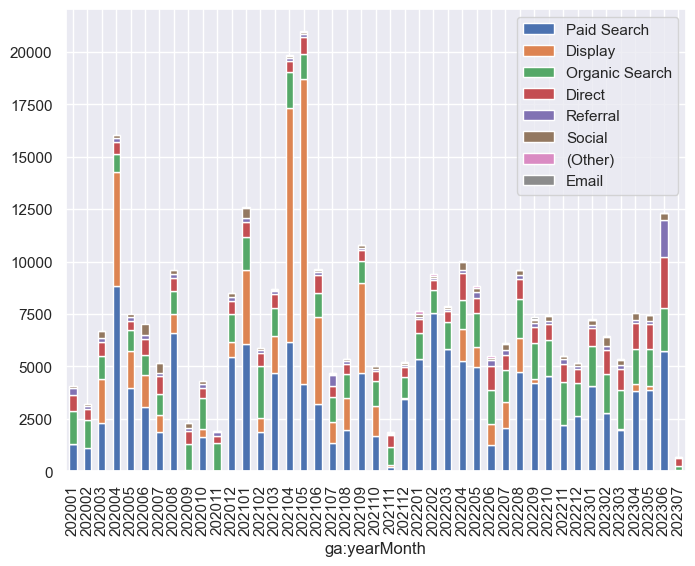

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn style
sns.set_theme()
sns.set(rc={'figure.figsize':(8,6)})

plot_data = report.loc[:, (slice(None), "ga:users")].iloc[:, 1:] # Pick users columns, drop the first one (sum)
plot_data.columns = plot_data.columns.get_level_values(0)
plot_data.index = plot_data.index.get_level_values(0)
plot_data.plot.bar(stacked = True);

In [31]:
plot_data

,Paid Search,Display,Organic Search,Direct,Referral,Social,(Other),Email
ga:yearMonth,,,,,,,,
202001,1288.0,25.0,1549.0,769.0,350.0,103.0,2.0,0.0
202002,1095.0,0.0,1335.0,535.0,144.0,114.0,1.0,0.0
202003,2290.0,2122.0,1094.0,655.0,203.0,315.0,3.0,0.0
202004,8837.0,5415.0,865.0,579.0,198.0,126.0,1.0,0.0
202005,3990.0,1736.0,986.0,444.0,188.0,139.0,0.0,0.0
202006,3042.0,1543.0,977.0,744.0,168.0,538.0,0.0,0.0
202007,1866.0,801.0,1035.0,852.0,138.0,466.0,2.0,0.0
202008,6584.0,937.0,1060.0,636.0,172.0,212.0,2.0,0.0
202009,23.0,12.0,1274.0,604.0,157.0,243.0,2.0,0.0


## Visualization Example No 2

In [32]:
body = body = {'reportRequests': [{'viewId': VIEW_ID, 
                            'dateRanges': [{'startDate': '2020-01-01', 'endDate': '2023-10-20'}],
                            'metrics': [{'expression': 'ga:sessions'},
                                        {"expression": "ga:avgSessionDuration"},
                                        {"expression": "ga:users"},
                                        {"expression": "ga:newUsers"}],
                            'dimensions': [{'name': 'ga:date'},
                                           {"name": "ga:channelGrouping"}],
                          }]}

report = run_report(body, ga_keys).reset_index() # index is turned into columns to help with visualization
report

,ga:date,ga:channelGrouping,ga:sessions,ga:avgSessionDuration,ga:users,ga:newUsers
0,20200101,Direct,35.0,108.771429,33.0,31.0
1,20200101,Display,4.0,149.000000,4.0,4.0
2,20200101,Organic Search,57.0,416.228070,44.0,27.0
3,20200101,Paid Search,61.0,67.852459,57.0,53.0
4,20200101,Referral,10.0,230.900000,10.0,8.0
...,...,...,...,...,...,...
995,20200623,Referral,15.0,252.800000,8.0,4.0
996,20200623,Social,46.0,248.913043,44.0,39.0
997,20200624,Direct,47.0,188.063830,43.0,36.0
998,20200624,Display,30.0,0.200000,28.0,26.0


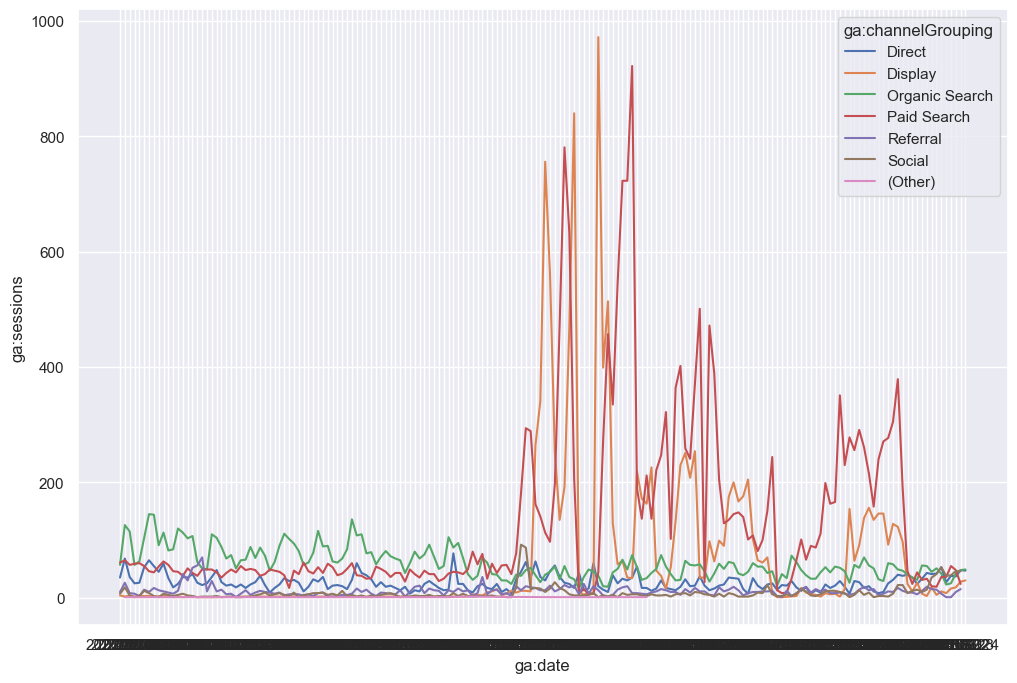

In [56]:
sns.set(rc={'figure.figsize':(12,8)})
plot_data = report.loc[:, ["ga:users"]]
sns.lineplot(data = report, y = "ga:sessions", x = 'ga:date', hue = 'ga:channelGrouping');

### Request pageviews, avgSessionDuration and devices

In [33]:
from apiclient.discovery import build
from oauth2client.service_account import ServiceAccountCredentials

SCOPES = ['https://www.googleapis.com/auth/analytics.readonly']
ga_keys = 'xxxxxx.json'
VIEW_ID = 'xxxxxxx'

credentials = ServiceAccountCredentials.from_json_keyfile_name(ga_keys, SCOPES)

# Build the service object.
analytics = build('analyticsreporting', 'v4', credentials=credentials)

In [34]:
response = analytics.reports().batchGet(body={
    'reportRequests': [{
        'viewId': VIEW_ID,
        'dateRanges': [{'startDate': '2022-01-01', 'endDate': '2023-10-20'}],
        'metrics': [
            {"expression": "ga:pageviews"},
            {"expression": "ga:avgSessionDuration"}
        ], "dimensions": [
            {"name": "ga:deviceCategory"}
        ]
    }]}).execute()
response

{'reports': [{'columnHeader': {'dimensions': ['ga:deviceCategory'],
    'metricHeader': {'metricHeaderEntries': [{'name': 'ga:pageviews',
       'type': 'INTEGER'},
      {'name': 'ga:avgSessionDuration', 'type': 'TIME'}]}},
   'data': {'rows': [{'dimensions': ['desktop'],
      'metrics': [{'values': ['188000', '139.9252216150577']}]},
     {'dimensions': ['mobile'],
      'metrics': [{'values': ['139809', '65.07821494945831']}]},
     {'dimensions': ['tablet'],
      'metrics': [{'values': ['3632', '74.7577250335871']}]}],
    'totals': [{'values': ['331441', '100.86698258952595']}],
    'rowCount': 3,
    'minimums': [{'values': ['3632', '65.07821494945831']}],
    'maximums': [{'values': ['188000', '139.9252216150577']}],
    'isDataGolden': True}}]}

In [35]:
import pandas as pd

def ga_response_dataframe(response):
    row_list = []
    # Get each collected report
    for report in response.get('reports', []):
        # Set column headers
        column_header = report.get('columnHeader', {})
        dimension_headers = column_header.get('dimensions', [])
        metric_headers = column_header.get('metricHeader', {}).get('metricHeaderEntries', [])
    
        # Get each row in the report
        for row in report.get('data', {}).get('rows', []):
            # create dict for each row
            row_dict = {}
            dimensions = row.get('dimensions', [])
            date_range_values = row.get('metrics', [])

            # Fill dict with dimension header (key) and dimension value (value)
            for header, dimension in zip(dimension_headers, dimensions):
                row_dict[header] = dimension

            # Fill dict with metric header (key) and metric value (value)
            for i, values in enumerate(date_range_values):
                for metric, value in zip(metric_headers, values.get('values')):
                # Set int as int, float a float
                    if ',' in value or '.' in value:
                        row_dict[metric.get('name')] = float(value)
                    else:
                        row_dict[metric.get('name')] = int(value)

            row_list.append(row_dict)
    return pd.DataFrame(row_list)

,ga:pageviews,ga:avgSessionDuration
ga:deviceCategory,,
desktop,188000,139.925222
mobile,139809,65.078215
tablet,3632,74.757725


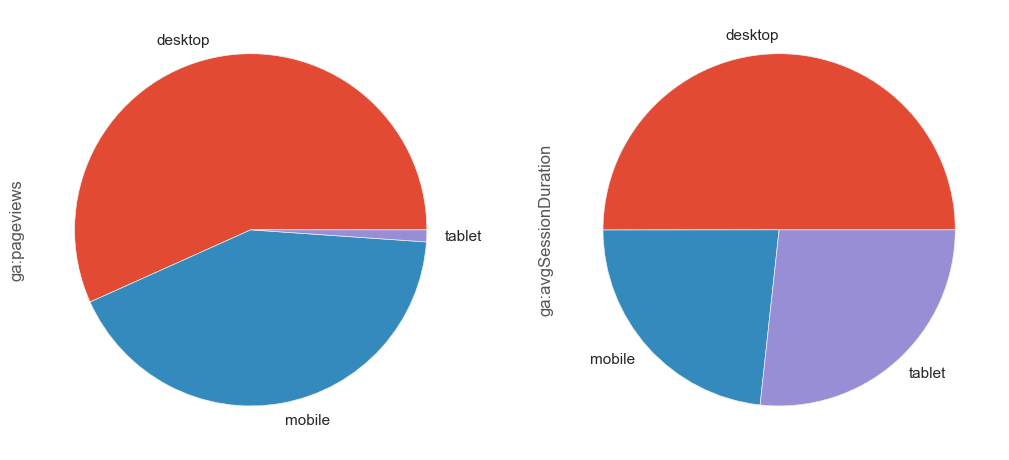

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df = ga_response_dataframe(response)
df.set_index('ga:deviceCategory', inplace=True)
axes = df.plot(kind='pie', figsize=(12.5, 6), subplots=True, legend=False)
df.head()

In [37]:
response = analytics.reports().batchGet(body={
    'reportRequests': [{
        'viewId': VIEW_ID,
        'dateRanges': [{'startDate': '2022-01-01', 'endDate': '2023-10-20'}],
        'metrics': [
            {"expression": "ga:sessions"},
        ], "dimensions": [
            {"name": "ga:longitude"},
            {"name": "ga:latitude"}
        ], "samplingLevel": "LARGE",
        "pageSize": 10000
    }]}).execute()

df = ga_response_dataframe(response)
df['ga:latitude'] = pd.to_numeric(df['ga:latitude'])
df['ga:longitude'] = pd.to_numeric(df['ga:longitude'])
df.head()

,ga:longitude,ga:latitude,ga:sessions
0,-0.0212,51.7435,1
1,-0.0457,43.0915,1
2,-0.0662,52.2178,1
3,-0.0808,53.5675,1
4,-0.0812,51.7958,2


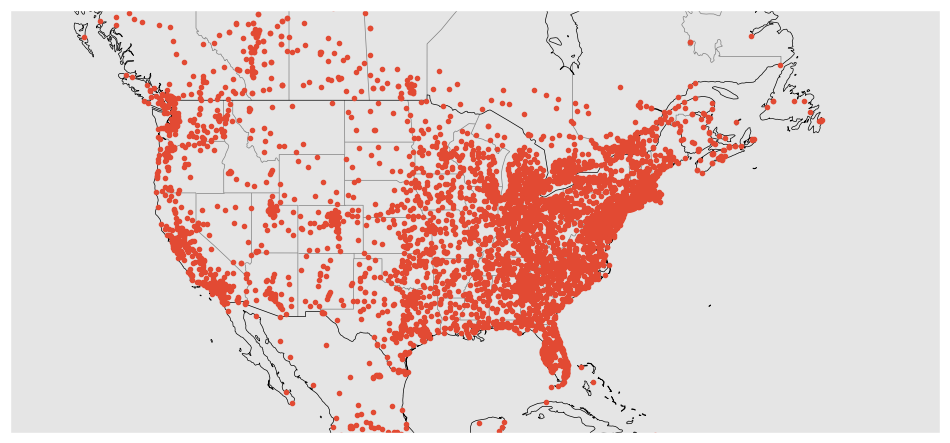

In [38]:
import cartopy
import cartopy.crs as ccrs

X = df[['ga:longitude', 'ga:latitude']].values

plt.figure(figsize=(12,68))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-140, -40, 20, 55], crs=ccrs.PlateCarree())
plt.plot(X[:, 0], X[:, 1], '.', transform=ccrs.Geodetic())

states_provinces = cartopy.feature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')
ax.add_feature(states_provinces, edgecolor='gray')
ax.add_feature(cartopy.feature.BORDERS, linestyle='-')
ax.add_feature(cartopy.feature.COASTLINE, linestyle='-')
plt.show()

In [39]:
response = analytics.reports().batchGet(body={
    'reportRequests': [{
        'viewId': VIEW_ID,
        'dateRanges': [{'startDate': '2022-01-01', 'endDate': '2023-10-20'}],
        'metrics': [
            {"expression": "ga:bounceRate"},
            {"expression": "ga:sessionDuration"}
        ], "dimensions": [
            {"name": "ga:browser"}
        ]
    }]}).execute()

df = ga_response_dataframe(response)

# Filter all entries with bounce rate of 100 and sessionDuration of 0
df = df[(df['ga:bounceRate'] < 100) & (df['ga:sessionDuration'] > 0.0)]
df.set_index('ga:browser', inplace=True)
df.head()

,ga:bounceRate,ga:sessionDuration
ga:browser,,
(not set),75.000000,66.0
Amazon Silk,81.034483,3095.0
Android Runtime,80.000000,75.0
Android Webview,75.037037,136742.0
Chrome,66.474004,12167459.0


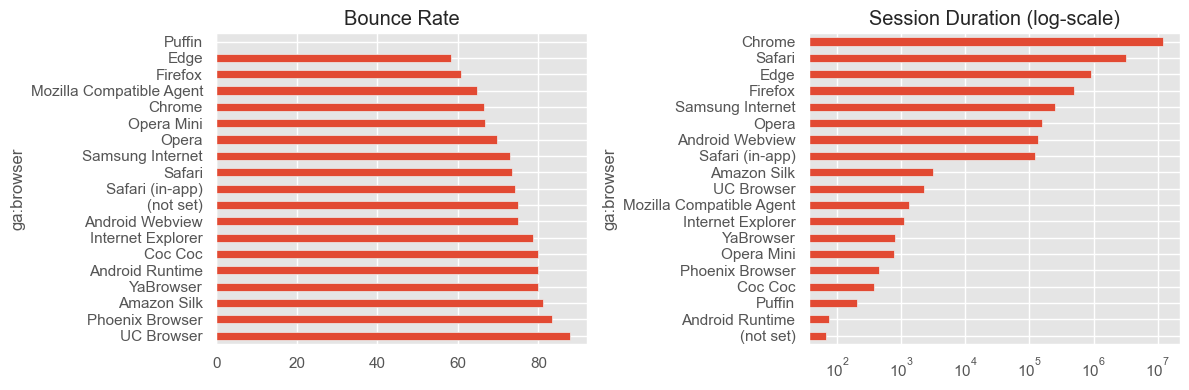

In [40]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
df['ga:bounceRate'].sort_values(ascending=False).plot(kind='barh', 
    color='C0', title='Bounce Rate')
plt.subplot(1, 2, 2)
df['ga:sessionDuration'].sort_values().plot(kind='barh', 
    logx=True, color='C0', title='Session Duration (log-scale)')
plt.tight_layout()